# Strategy to group Engineering Colleges

You are an independent trainer who would like to pitch your Data Science training program to a set of Engineering colleges. You have data of 26 colleges after survey using questionnaires. Each college has been given a score for 5 performance criteria-Teaching, Fees, Placement, Internship & Infrastructure. Ratings are in the standardized scale of 1 to 5 where 5 has a higher weightage than 1. Segment the colleges into groups and come up with your pitch recommendations for each segment.

# Import Libraries and load data

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\Karuna\\Documents\\Mentor GL Python Jan 2020\\Data Mining\\Week 1 - Clustering'

In [2]:
df=pd.read_csv('Engg_College_Data.csv') 

# Checking the data

In [14]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [15]:
df.shape

(26, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
SR_NO             26 non-null int64
Engg_College      26 non-null object
Teaching          26 non-null int64
Fees              26 non-null int64
Placements        26 non-null int64
Internship        26 non-null int64
Infrastructure    26 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.4+ KB


# Get the count of unique values for Engg_College

In [103]:
df.Engg_College.nunique()

26

# Get the unique values for Engg_College

In [104]:
df.Engg_College.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

# Checking the Summary Statistic

In [105]:
df.describe() 

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Removing the SR_NO column and storing the result in new object enggdata

In [30]:
df.head(2)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3


In [3]:
df1=df.iloc[:,[1,2,4,5,6]]
df1.head(2)

,Engg_College,Teaching,Placements,Internship,Infrastructure
0,A,5,5,5,3
1,B,4,5,5,3


In [4]:
df3=df.drop('Fees',axis=1)
df3.head(5)

,SR_NO,Engg_College,Teaching,Placements,Internship,Infrastructure
0,1,A,5,5,5,3
1,2,B,4,5,5,3
2,3,C,4,5,4,5
3,4,D,5,5,4,4
4,5,E,2,2,2,5


In [5]:
df2=df.drop(df.columns[3],axis=1)
df2.head(5)

,SR_NO,Engg_College,Teaching,Placements,Internship,Infrastructure
0,1,A,5,5,5,3
1,2,B,4,5,5,3
2,3,C,4,5,4,5
3,4,D,5,5,4,4
4,5,E,2,2,2,5


In [106]:
df.head(2)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3


In [6]:
enggdata = df.iloc[:,1:7] 

In [108]:
enggdata.head(2)

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3


# Creating the Dendrogram
### Importing dendrogram and linkage module

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing average linkage method

In [8]:
link_method = linkage(enggdata.iloc[:,1:6], method = 'average')
len(link_method)

25

In [9]:
labelList = np.array(enggdata.Engg_College)
len(labelList)

26

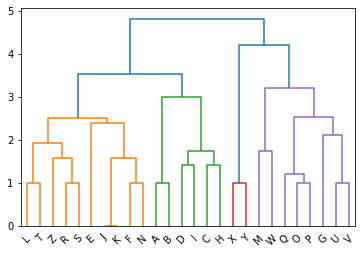

In [10]:
dend = dendrogram(link_method,labels = labelList)

### Cutting the Dendrogram with suitable clusters

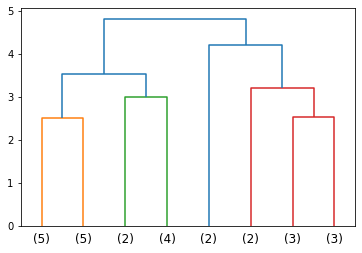

In [12]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 8
#                  labels = labelList 
                 )

# Importing fcluster module to create clusters

In [118]:
from scipy.cluster.hierarchy import fcluster

In [124]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

In [99]:

#clusters1 = fcluster(link_method, 3, criterion='distance')
#clusters1

array([2, 2, 3, 3, 1, 1, 6, 3, 3, 1, 1, 1, 5, 1, 6, 6, 6, 1, 1, 1, 6, 6,
       5, 4, 4, 1], dtype=int32)

Appending clusters to original dataset

In [120]:
df['clusters'] = clusters

In [122]:
df.head(10)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,1
5,6,F,3,4,3,3,4,1
6,7,G,1,3,1,1,2,3
7,8,H,4,4,5,5,5,1
8,9,I,4,4,4,4,4,1
9,10,J,3,4,3,4,5,1


### Cluster Frequency

In [125]:
df.clusters.value_counts().sort_index()

1    16
2     2
3     8
Name: clusters, dtype: int64

# Cluster Profiles

In [126]:
aggdata=df.iloc[:,1:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
clusters,,,,,,
1,3.375,4.125,3.875,3.4375,3.875,16
2,1.000,1.000,1.000,1.5000,5.000,2
3,2.125,3.125,1.375,1.7500,2.000,8


- Cluster 1: Tier 1 colleges (Top Colleges)
- Cluster 2: Tier 3 colleges (Poor performing colleges/new college)
- Cluster 3: Tier 2 colleges (Medium performing colleges)

# Recommendations
1. For companies hiring, go to colleges for Placements are Tier 1 colleges, followed by Tier 2 colleges
2. For companies providing Training program to staffs and students, go to colleges are Tier 2 and Tier 3 Colleges, since Tier 1 is comparitively performing better.
3. Tier 3 colleges will need to concentrate more on Marketing and Advertisements about their campus to create awareness and attract students
4. Students looking to enroll in a college, can give priority to Tier 1 over Tier 2 and 3 colleges 

# Saving the Cluster Profiles in a csv file

In [127]:
aggdata.to_csv('enggdata_hc1.csv')